In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("RSCCASN.csv")

In [3]:
df.head()

,DATE,RSCCASN
0,1992-01-01,6938
1,1992-02-01,7524
2,1992-03-01,8475
3,1992-04-01,9401
4,1992-05-01,9558


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DATE     334 non-null    object
 1   RSCCASN  334 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.3+ KB


In [5]:
df=pd.read_csv("RSCCASN.csv",parse_dates=True,index_col='DATE')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [7]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [8]:
df.columns=['Sales']

In [9]:
df.head()

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


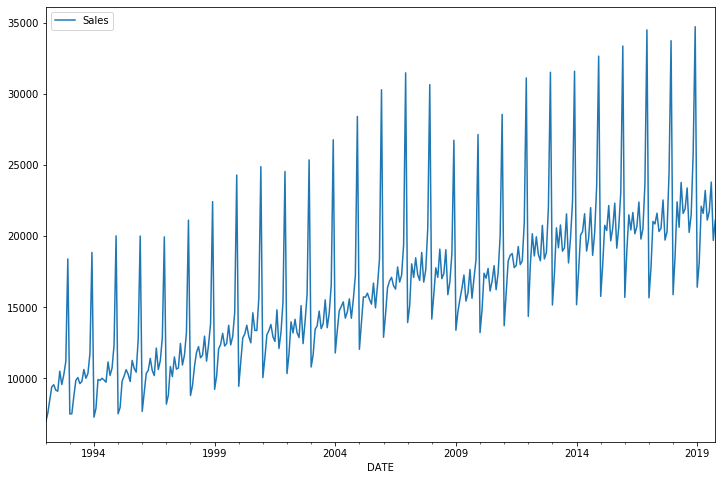

In [10]:
df.plot(figsize=(12,8))

In [11]:
len(df)

334

In [12]:
#Lets take 1.5 years i.e. 18 months as a testing data

In [13]:
len(df)-18

316

In [14]:
test_size=18

In [15]:
test_index=len(df)-test_size

In [16]:
train=df.iloc[:test_index]
test=df.iloc[test_index:]

In [17]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [18]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler=MinMaxScaler()

In [21]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [22]:
scaled_train=scaler.transform(train)

In [23]:
scaled_test=scaler.transform(test)

In [24]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [25]:
length=12

generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

In [26]:
X,y=generator[0]

In [27]:
X

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [28]:
y

array([[0.02047633]])

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [30]:
n_features=1

In [31]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features),return_sequences=True))
model.add(LSTM(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12, 100)           40800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [47]:
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [49]:
validation_gen=TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [76]:
model.fit(generator,epochs=20,validation_data=validation_gen,callbacks=[early_stop])

Train for 304 steps, validate for 6 steps
Epoch 1/20
304/304 [==============================] - 3s 9ms/step - loss: 0.0010 - val_loss: 0.0034
Epoch 2/20
304/304 [==============================] - 3s 10ms/step - loss: 0.0011 - val_loss: 6.9917e-04
Epoch 3/20
304/304 [==============================] - 3s 9ms/step - loss: 9.5772e-04 - val_loss: 0.0012
Epoch 4/20
304/304 [==============================] - 3s 10ms/step - loss: 0.0012 - val_loss: 2.9780e-04
Epoch 5/20
304/304 [==============================] - 3s 11ms/step - loss: 0.0014 - val_loss: 4.4925e-04
Epoch 6/20
304/304 [==============================] - 4s 12ms/step - loss: 0.0011 - val_loss: 2.3842e-04
Epoch 7/20
304/304 [==============================] - 4s 13ms/step - loss: 9.4545e-04 - val_loss: 6.8211e-04
Epoch 8/20
304/304 [==============================] - 4s 12ms/step - loss: 9.8521e-04 - val_loss: 9.2486e-04


In [77]:
losses=pd.DataFrame(model.history.history)

In [78]:
losses

,loss,val_loss
0,0.001043,0.003402
1,0.001118,0.000699
2,0.000958,0.001232
3,0.001169,0.000298
4,0.001424,0.000449
5,0.001084,0.000238
6,0.000945,0.000682
7,0.000985,0.000925


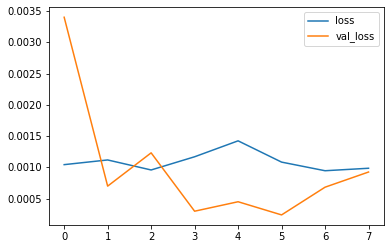

In [79]:
losses.plot()

In [80]:
test_index

316

In [81]:
test_predictions=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape(1,length,n_features)

for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [82]:
true_predictions=scaler.inverse_transform(test_predictions)

In [83]:
test['Predictions']=true_predictions

d:\anaconda3\envs\mytfenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
test

,Sales,Predictions
DATE,,
2018-05-01,23764,22046.182838
2018-06-01,21589,20978.194693
2018-07-01,21919,21122.562009
2018-08-01,23381,22783.788429
2018-09-01,20260,20399.057412
2018-10-01,21473,20881.398735
2018-11-01,25831,24691.640226
2018-12-01,34706,33804.548141
2019-01-01,16410,16933.357751


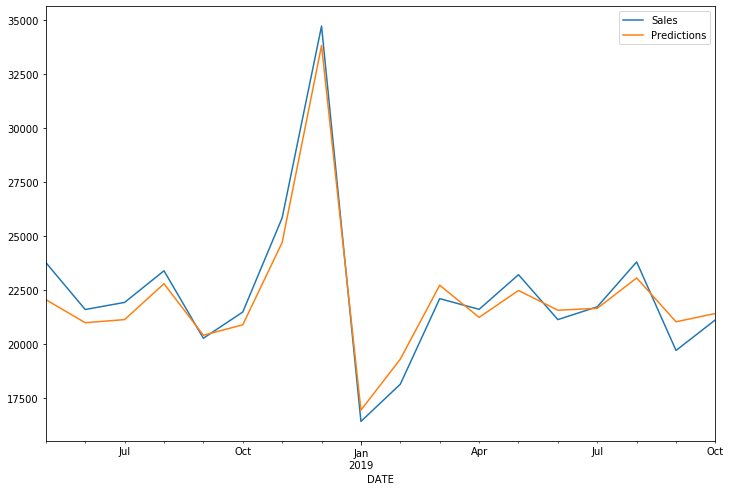

In [86]:
test.plot(figsize=(12,8))
plt.savefig('test_data.jpeg')

In [64]:
full_scaler=MinMaxScaler()
full_scaled_data=full_scaler.fit_transform(df)

In [65]:
length=12
full_generator=TimeseriesGenerator(full_scaled_data,full_scaled_data,length=length,batch_size=1)

In [66]:
model.fit(full_generator,epochs=6)

Train for 322 steps
Epoch 1/6
322/322 [==============================] - 3s 9ms/step - loss: 0.0011
Epoch 2/6
322/322 [==============================] - 3s 9ms/step - loss: 0.0011
Epoch 3/6
322/322 [==============================] - 3s 11ms/step - loss: 0.0013
Epoch 4/6
322/322 [==============================] - 3s 9ms/step - loss: 9.9812e-04
Epoch 5/6
322/322 [==============================] - 3s 10ms/step - loss: 0.0012
Epoch 6/6
322/322 [==============================] - 3s 10ms/step - loss: 0.0016


In [67]:
forecast=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape(1,length,n_features)

for i in range(12):
    current_pred=model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [68]:
forecast=full_scaler.inverse_transform(forecast)

In [69]:
df.tail()

,Sales
DATE,
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791
2019-09-01,19695
2019-10-01,21113


In [70]:
forecast_index=pd.date_range(start='2019-11-01',periods=12,freq='MS')

In [71]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [72]:
forecast_df=pd.DataFrame(data=forecast,index=forecast_index,columns=["Forecast"])

In [73]:
forecast_df

,Forecast
2019-11-01,22204.902083
2019-12-01,20982.394258
2020-01-01,21163.490529
2020-02-01,23080.217553
2020-03-01,20372.018377
2020-04-01,20926.190312
2020-05-01,25461.986799
2020-06-01,34658.771671
2020-07-01,17048.899238
2020-08-01,19299.469393


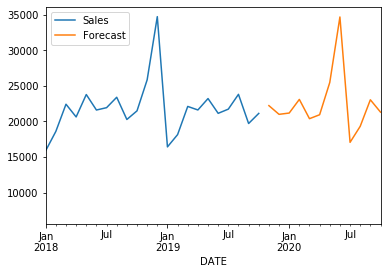

In [75]:
ax=df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2020-10-01')
plt.savefig('forecast.jpeg')